## 00. Coding Best Practices

In [87]:
##  Basic Libraries ## 

import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

##  Encoding ## 
from sklearn.preprocessing import LabelEncoder

##  Machine Learning ## 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Settings ## 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [108]:
## Basic functions ## 

def data_info(data): # improved data.info()
    print(f"The DataFrame shape is {data.shape}.")
    print()
    print("The DataFrame data types are:")
    print(data.dtypes.value_counts().tolist())
    print(data.dtypes.value_counts().index.tolist())
    print()
    print("DataFrame random row sample and full columns:")
    return data.sample(5)

def clean_columns(data_copy): # Standardizes the column name, returns the columns
    data_copy.columns = [i.lower().replace(' ', '_') for i in data_copy.columns]
    return data_copy.sample(0)
    
def check_null_cols(data_copy): # Checks for empty cells in the entire DataFrame
    null_cols = data_copy.isnull().sum()
    null_cols = null_cols[null_cols > 0]
    print(null_cols)
    
def check_nan_cols(data_copy): # Checks for NaN values in the entire DataFrame
    nan_cols = data_copy.isna().sum()
    nan_cols = nan_cols[nan_cols > 0]
    print(nan_cols)
    
def is_significant(column_name, data_copy): # takes a column name
    n_data = len(data_copy)
    n_nulls = data_copy[column_name].isnull().sum() # counts all NaNs of column name
    null_percentage = n_nulls / n_data * 100
    print(f"{null_percentage:.2f}% of the '{column_name}' column are empty.")
    
## Specific functions for this dataset ## 

def convert_value(value): # function to convert value to unified format
    try:
        if isinstance(value, float):
            return value
        elif value.endswith('K'):
            return float(value[1:-1]) * 1000
        elif value.endswith('M'):
            return float(value[1:-1]) * 1000000
        else:
            return float(value)
    except ValueError:
        return None

## 01 - Getting the Data

In [89]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. iron-activity/project-mbappe", "fifa21_male2.csv")
data = pd.read_csv(file_path)
data_info()

The DataFrame shape is (17125, 107).

The DataFrame data types are:
[52, 45, 10]
[dtype('O'), dtype('int64'), dtype('float64')]

DataFrame random row sample and full columns:


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
10140,234991,M. Opondo,22,64,Uganda,Odense Boldklub,66,CAM,CM,https://cdn.sofifa.com/players/234/991/20_120.png,https://cdn.sofifa.com/teams/272/light_60.png,https://cdn.sofifa.com/flags/ug.png,72,Odense Boldklub 2019 ~ 2023,"5'9""",159lbs,Right,8,"Jun 17, 2019",NaN,€650K,€3K,€943K,2019 ~ 2023,261,44,58,41,67,51.0,281,64,52.0,35,62,68,370,70,77,78.0,64,81.0,345,61,71.0,90,68,55,285,49,58.0,61.0,59.0,58,56.0,168,57,57,54.0,52,14,10,6,12,10,1762,382,3 ★,3★,High,Medium,1 ★,74,58,58,67,55,70,9,61+2,61+2,61+2,63+0,63+0,63+0,63+0,63+0,64+2,64+2,64+2,64+2,64+2,64+2,64+2,64+2,63+2,63+2,63+2,63+2,63+2,62+2,58+2,58+2,58+2,62+2,17+2,Male
16946,258652,Rubén Pulido,19,62,Spain,CF Fuenlabrada,64,CB,CB,https://cdn.sofifa.com/players/258/652/20_120.png,https://cdn.sofifa.com/teams/110065/light_60.png,https://cdn.sofifa.com/flags/es.png,73,CF Fuenlabrada 2020 ~ 2024,"6'0""",181lbs,Right,11,"Sep 7, 2020",NaN,€475K,€750,€831K,2020 ~ 2024,237,55,28,66,52,36.0,213,51,29.0,31,48,54,311,66,65,58.0,60,62.0,290,61,75.0,60,64,30,242,67,63.0,35.0,34.0,43,58.0,180,58,62,60.0,46,13,6,10,6,11,1519,327,3 ★,2★,Medium,Medium,1 ★,65,37,46,54,61,64,5,49+2,49+2,49+2,49+0,48+0,48+0,48+0,49+0,47+2,47+2,47+2,51+2,49+2,49+2,49+2,51+2,59+2,57+2,57+2,57+2,59+2,60+2,62+2,62+2,62+2,60+2,15+2,Male
7306,222916,J. Ginnelly,23,66,England,Preston North End,67,RM,LM RM,https://cdn.sofifa.com/players/222/916/20_120.png,https://cdn.sofifa.com/teams/1801/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Preston North End 2019 ~ 2021,"5'8""",143lbs,Right,5,"Jan 1, 2019",NaN,€850K,€7K,€1.7M,2019 ~ 2021,267,61,54,45,56,51.0,299,67,58.0,56,53,65,405,92,90,87.0,56,80.0,318,65,60.0,79,58,56,258,45,43.0,58.0,60.0,52,61.0,133,49,46,38.0,68,11,13,16,13,15,1748,380,4 ★,3★,High,High,1 ★,91,57,57,69,45,61,8,61+2,61+2,61+2,65+0,63+0,63+0,63+0,65+0,63+2,63+2,63+2,65+2,58+2,58+2,58+2,65+2,59+2,53+2,53+2,53+2,59+2,57+2,49+2,49+2,49+2,57+2,18+2,Male
5240,210149,M. Majrashi,29,60,Saudi Arabia,Al Fateh,60,ST,ST LM,https://cdn.sofifa.com/players/210/149/20_120.png,https://cdn.sofifa.com/teams/112390/light_60.png,https://cdn.sofifa.com/flags/sa.png,60,Al Fateh 2019 ~ 2021,"5'11""",159lbs,Right,0,"Jun 25, 2019",NaN,€210K,€5K,€347K,2019 ~ 2021,288,48,57,64,56,63.0,230,63,40.0,23,43,61,299,68,65,65.0,53,48.0,354,64,87.0,71,79,53,211,56,12.0,53.0,41.0,49,51.0,69,12,27,30.0,57,9,14,15,12,7,1508,328,3 ★,2★,High,Medium,1 ★,66,57,47,61,24,73,3,60+0,60+0,60+0,57+0,57+0,57+0,57+0,57+0,56+2,56+2,56+2,57+2,50+2,50+2,50+2,57+2,44+2,41+2,41+2,41+2,44+2,43+2,41+2,41+2,41+2,43+2,15+2,Male
9897,234122,Artur,24,72,Brazil,Columbus Crew SC,73,CDM,CDM CM,https://cdn.sofifa.com/players/234/122/20_120.png,https://cdn.sofifa.com/teams/687/light_60.png,https://cdn.sofifa.com/flags/br.png,77,Columbus Crew SC 2018 ~ 2021,"5'11""",154lbs,Right,5,"Feb 7, 2018",NaN,€3.8M,€5K,€6M,2018 ~ 2021,279,54,49,59,75,42.0,319,70,49.0,59,68,73,341,61,67,77.0,68,68.0,320,59,60.0,83,69,49,328,74,68.0,64.0,65.0,57,68.0,211,69,73,69.0,40,6,6,10,13,5,1838,395,2 ★,3★,Medium,Medium,1 ★,64,52,66,71,69,73,36,62+2,62+2,62+2,65+0,65+0,65+0,65+0,65+0,67+2,67+2,67+2,67+2,69+2,69+2,69+2,67+2,69+2,71+2,71+2,71+2,69+2,69+2,69+2,69+2,69+2,69+2,14+2,Male


_____________
The following dataset is a collection of **one-year** 17.125 player information distributed among 107 different columns. The majority of our data types are mostly **numericals** (52 object / 45 integers / 10 floats).

Our **project goal** is to identify players who have the potential to become **the next Mbappé**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we decide to proceed with the following **strategy**:

1. The majority of the data types are **numericals**, so we will work with that to make a Linear Regression model.
2. The **target** for our dataset it will be the `OVA` (overall score) of a player.
3. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

Firstly, to prepare our data for analysis we will remove some numerical columns related to player-potential such as `'attacking'`, `'crossing'` or `'short_passing'` which is already calculated as sums of other columns (e.g `total_stats`, `base_stats`).

We will also convert categorical columns like `'Value'`, `'Wage'`, and `'Release Clause'` to numercial by removing symbols such as € and K.

Also, we will features such as `'height'`, `'weight'`, etc., converting them to the metric system by removing quotation symbols or lbs.
_____________

## 02 - Cleaning the Data

In [90]:
data_copy = data.copy() # as best practices, we do first a copy of our dataframe

In [91]:
clean_columns() # Standardizes the column name from data_copy

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


### Dealing with Null values

In [92]:
check_null_cols() # Checks for empty cells in the entire DataFrame

club                 23
position            413
club_logo            23
joined               58
loan_date_end     16215
volleys              58
curve                58
agility              58
balance              58
jumping              58
interceptions         7
positioning           7
vision               58
composure           423
sliding_tackle       58
a/w                  89
d/w                  89
dtype: int64


In [93]:
# We get rid of loan_date since it has way too many NaN values
data_copy = data_copy.drop(columns=["loan_date_end"])

In [94]:
is_significant('composure', data_copy)

2.47% of the 'composure' column are empty.


In [95]:
# 2.47% is not significant. We will drop it.
data_copy = data_copy.drop(columns=["composure"])

In [96]:
check_nan_cols()

club               23
position          413
club_logo          23
joined             58
volleys            58
curve              58
agility            58
balance            58
jumping            58
interceptions       7
positioning         7
vision             58
sliding_tackle     58
a/w                89
d/w                89
dtype: int64


In [97]:
is_significant('position', data_copy)

2.41% of the 'position' column are empty.


In [98]:
# 2.41% is not significant. We will drop it.
data_copy = data_copy.drop(columns=["position"])

The features `value`, `wage`, and `'release Clause'` are interesting columns to work with. However, they contain symbols such as € and K, so they need to be converted to numerical values. 

In [99]:
data_check = data_copy[['value', 'wage', 'release_clause']]
data_check.head(10)

,value,wage,release_clause
0,€625K,€7K,€0
1,€600K,€7K,€1.1M
2,€1.1M,€15K,€0
3,€0,€0,€0
4,€5.5M,€12K,€7.2M
5,€725K,€5K,€0
6,€2.8M,€44K,€5.3M
7,€1K,€60K,€0
8,€0,€0,€0
9,€400K,€40K,€0


In [100]:
# We will use convert_value function to convert value to unified format
data_copy['value'] = data_copy['value'].apply(convert_value) # Applying the function
data_copy['wage'] = data_copy['wage'].apply(convert_value)
data_copy['release_clause'] = data_copy['release_clause'].apply(convert_value)
# Visualizing the changes
data_checkmate = data_copy[['value', 'wage', 'release_clause']] 
data_comparision = pd.concat([data_check, data_checkmate], axis=1) # merging to compare the changes
data_comparision.head(10)

,value,wage,release_clause,value,wage,release_clause
0,€625K,€7K,€0,625000.0,7000.0,NaN
1,€600K,€7K,€1.1M,600000.0,7000.0,1100000.0
2,€1.1M,€15K,€0,1100000.0,15000.0,NaN
3,€0,€0,€0,NaN,NaN,NaN
4,€5.5M,€12K,€7.2M,5500000.0,12000.0,7200000.0
5,€725K,€5K,€0,725000.0,5000.0,NaN
6,€2.8M,€44K,€5.3M,2800000.0,44000.0,5300000.0
7,€1K,€60K,€0,1000.0,60000.0,NaN
8,€0,€0,€0,NaN,NaN,NaN
9,€400K,€40K,€0,400000.0,40000.0,NaN


### Encoding
* Some columns considered as **categoricals** are actually **numericals**
* e.g: `height`, `weight`, etc.

In [101]:
# Convert height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
# Convert weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

# Applying lambda to:

# weak_foot 
data_copy['w_f'] = data_copy['w/f'].apply(lambda x: int(x[0]))
# skilled_moves
data_copy['sm'] = data_copy['sm'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# international_reputation
data_copy['ir'] = data_copy['ir'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# Visualizing the changes
data_encoded = data_copy[['h_cm', 'w_kg', 'hits', 'w_f', 'sm', 'ir']]
data_encoded.head(5)

,h_cm,w_kg,hits,w_f,sm,ir
0,182.88,82.101061,4,3,2,2
1,177.80,64.864374,4,4,3,1
2,175.26,73.029121,11,4,4,2
3,180.34,74.843509,3,3,1,1
4,170.18,68.039554,149,4,4,4


### Further Encoding

In [102]:
data_f_encoding = data_copy[['a/w', 'd/w']]
data_f_encoding.head(5)

,a/w,d/w
0,Medium,High
1,Medium,Medium
2,Medium,Low
3,NaN,NaN
4,High,Medium


In [103]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a_wr'] = le.fit_transform(data_copy['a/w'])
data_copy['d_wr'] = le.fit_transform(data_copy['d/w'])

# Visualizing the changes
data_encoded_f = data_copy[['a_wr', 'd_wr']]
data_comparision_2 = pd.concat([data_f_encoding, data_encoded_f], axis=1)
data_comparision_2.head(5)

,a/w,d/w,a_wr,d_wr
0,Medium,High,2,0
1,Medium,Medium,2,2
2,Medium,Low,2,1
3,NaN,NaN,3,3
4,High,Medium,0,2


### Selecting numericals

In [116]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).fillna(0) # we also deal with NaN values
X_N.head(10)

,id,age,ova,bov,pot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,sm,ir,pac,sho,pas,dri,def,phy,hits,h_cm,w_kg,w_f,a_wr,d_wr
0,2,33,69,71,69,0,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,2,71,59,70,71,68,69,4,182.88,82.101061,3,2,0
1,16,37,71,70,71,0,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,153,70,43,40.0,56,9,12,13,11,11,1906,385,3,1,53,69,73,69,58,63,4,177.80,64.864374,4,2,2
2,27,33,71,71,71,0,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,2,45,68,76,77,36,52,11,175.26,73.029121,4,2,1
3,36,36,68,70,82,14,0.0,0.0,0.0,264,54,70,60,80,0.0,255,68,0.0,46,64,77,176,59,62,0.0,55,0.0,239,63,0.0,51,66,59,271,59,70.0,72.0,0.0,70,75,34,41,0.0,68,5,21,64,21,21,1348,369,1,1,61,66,66,69,47,60,3,180.34,74.843509,3,3,3
4,41,36,81,82,81,0,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,58,70,85,85,63,59,149,170.18,68.039554,4,0,2
5,61,27,66,66,70,4,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,79,22,26,31.0,46,8,13,7,9,9,1649,360,3,2,91,56,56,67,27,63,7,172.72,73.936315,2,2,2
6,80,38,77,77,77,0,2800000.0,44000.0,5300000.0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,190,65,65,60.0,47,7,11,7,14,8,2017,403,4,2,44,71,83,77,62,66,7,170.18,72.121927,4,2,2
7,241,39,78,78,78,0,1000.0,60000.0,0.0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,120,26,43,51.0,32,10,5,7,5,5,1939,392,3,3,60,72,85,77,41,57,9,177.80,71.214733,2,2,2
8,244,35,76,78,82,6,0.0,0.0,0.0,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,242,78,81,83.0,43,12,9,5,6,11,1774,378,2,3,67,36,67,53,81,74,4,177.80,78.925882,3,3,3
9,246,37,80,82,80,0,400000.0,40000.0,0.0,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,143,58,49,36.0,47,7,12,5,15,8,2065,415,3,2,53,76,87,79,59,61,7,170.18,71.214733,3,2,2


In [115]:
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['id', 'age', 'ova', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w_f', 'a_wr', 'd_wr']


We then drop the columns that are summarized in other features. 
e.g> 'attacking' = 'crossing' + 'finishing' + 'heading_accuracy' + 'short_passing' + 'volleys'

In [188]:
# We simply move our target overall_scores to the right, for readibility and remove ID
X_N = X_N[['age', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 
           'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 
           'goalkeeping','total_stats', 'base_stats', 'sm', 'ir','hits', 'h_cm', 
           'w_kg', 'w_f', 'a_wr', 'd_wr', 'ova']]
X_N.shape

(5429, 25)

**Now**, we have a cleaned dataset with `17.125` numerical player information in `25` distinct numerical features.

In [202]:
# Final check, we check for empty cells and NaN in our new dataframe
check_null_cols(X_N)
check_nan_cols(X_N)

Series([], dtype: int64)
Series([], dtype: int64)


In [203]:
X_N.sample(5)

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
5495,27,64,64,1,425000.0,4000.0,776000.0,291,291,352,328,275,103,60,1700,357,3,1,6,180.34,76.204300,3,2,2,63
13677,21,63,72,11,450000.0,1000.0,878000.0,271,228,324,296,233,52,47,1451,315,2,1,4,182.88,74.843509,3,2,2,61
9221,22,65,71,7,625000.0,3000.0,1100000.0,302,286,345,268,221,80,47,1549,336,3,1,7,177.80,69.853942,3,2,1,64
11606,31,66,66,0,550000.0,1000.0,688000.0,297,330,273,335,273,159,57,1724,352,3,1,4,185.42,79.833076,3,1,1,66
11127,24,70,75,6,1400000.0,9000.0,2400000.0,322,328,373,330,263,104,57,1777,384,3,1,3,180.34,74.843509,3,0,2,69


## 03 - Exploratory Data Analysis

In [204]:
X_N.describe() # basic statistics for all numerical values

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
count,5429.000000,5429.000000,5429.000000,5429.000000,5.429000e+03,5429.000000,5.429000e+03,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.0,5429.000000,5429.000000,5429.000000,5429.0,5429.000000,5429.000000,5429.000000
mean,24.244981,64.779333,69.949162,6.363234,6.421894e+05,2870.694419,1.030113e+06,264.466753,272.097624,329.696077,302.857801,263.683551,141.115675,51.995763,1625.913244,348.696261,2.439123,1.0,6.204642,179.863253,73.612472,3.0,1.389206,1.568981,63.585927
std,4.376660,4.346193,4.366668,5.691461,4.828286e+05,2695.052219,8.016813e+05,32.927829,37.996311,35.858866,35.068310,33.059036,51.773872,6.995273,143.276267,29.120282,0.536977,0.0,3.768974,6.349320,6.488006,0.0,0.901833,0.756380,4.619716
min,16.000000,49.000000,54.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,165.000000,161.000000,186.000000,197.000000,174.000000,33.000000,32.000000,1166.000000,257.000000,2.000000,1.0,3.000000,154.940000,49.895673,3.0,0.000000,0.000000,48.000000
25%,21.000000,62.000000,67.000000,0.000000,3.000000e+05,1000.000000,4.390000e+05,241.000000,244.000000,308.000000,278.000000,239.000000,92.000000,47.000000,1519.000000,328.000000,2.000000,1.0,3.000000,175.260000,69.853942,3.0,0.000000,1.000000,61.000000
50%,24.000000,65.000000,70.000000,6.000000,5.500000e+05,2000.000000,8.750000e+05,266.000000,272.000000,332.000000,304.000000,263.000000,158.000000,52.000000,1626.000000,349.000000,2.000000,1.0,5.000000,180.340000,73.029121,3.0,2.000000,2.000000,64.000000
75%,27.000000,68.000000,73.000000,10.000000,8.500000e+05,4000.000000,1.400000e+06,289.000000,299.000000,354.000000,328.000000,287.000000,186.000000,57.000000,1731.000000,370.000000,3.000000,1.0,8.000000,182.880000,78.018688,3.0,2.000000,2.000000,67.000000
max,41.000000,79.000000,82.000000,25.000000,5.000000e+06,13000.000000,3.800000e+06,366.000000,380.000000,431.000000,413.000000,362.000000,239.000000,72.000000,2067.000000,444.000000,5.000000,1.0,19.000000,200.660000,99.791345,3.0,3.000000,3.000000,79.000000


In [192]:
## TO CORRECT... To learn... How to deal with Outliers??? ##
## I have 64 features, how can I easily check them? ##

In [193]:
# Looking at Overall Score Plaer with rating >80
mvps = data_copy[(data_copy['ova'] > 80)]

# Sort the MVPs
mvps_sorted = mvps.sort_values('ova', ascending=False)
mvps_sorted.head(5)

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4,Medium,Low,5,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male,170.18,72.121927,4,2,1,0
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5,High,Low,5,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male,187.96,83.008255,4,0,1,0
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",80000000.0,240000.0,132000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4,High,Medium,4,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male,182.88,79.833076,4,0,2,0
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",90000000.0,270000.0,166500000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5,High,Medium,5,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male,175.26,68.039554,5,0,2,0
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",87000000.0,370000.0,161000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4,High,High,4,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89

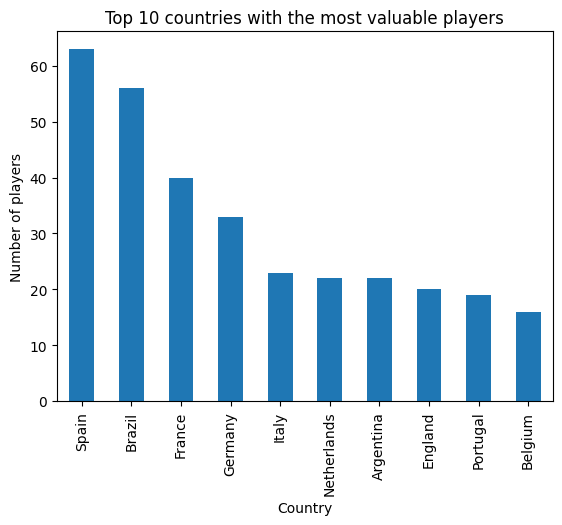

In [194]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

In [195]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['pot'] - data_copy['ova'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents_sorted = talents.sort_values('pot_minus_ova', ascending=False)
talents_sorted.head(3)

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",150000.0,1000.0,450000.0,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2,Medium,Medium,1,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,177.80,68.039554,3,2,2,26
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,https://cdn.sofifa.com/players/259/074/20_120.png,https://cdn.sofifa.com/teams/896/light_60.png,https://cdn.sofifa.com/flags/ch.png,79,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,26,"Sep 14, 2020",120000.0,NaN,300000.0,2020 ~ 2024,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,157,47,58,52.0,46,12,9,9,11,5,1207,259,3 ★,2,Low,Medium,1,60,25,30,29,53,62,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male,187.96,79.833076,3,1,2,26
16812,258315,B. Arrey-Mbi,17,60,Germany,Bayern München II,62,CB,https://cdn.sofifa.com/players/258/315/20_120.png,https://cdn.sofifa.com/teams/110679/light_60.png,https://cdn.sofifa.com/flags/de.png,86,Bayern München II 2020 ~ 2022,"6'2""",168lbs,Left,26,"Jul 1, 2020",425000.0,NaN,1000000.0,2020 ~ 2022,204,34,25,59,56,30.0,207,49,31.0,29,44,54,324,66,70,68.0,52,68.0,273,38,78.0,62,71,24,228,63,53.0,35.0,44.0,33,180,55,64,61.0,50,13,9,8,12,8,1466,322,3 ★,2,Medium,Medium,1,68,29,45,54,58,68,720,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,55+2,56+2,56+2,56+2,55+2,57+2,60+2,60+2,60+2,57+2,15+2,Male,187.96,76.204300,3,2,2,26


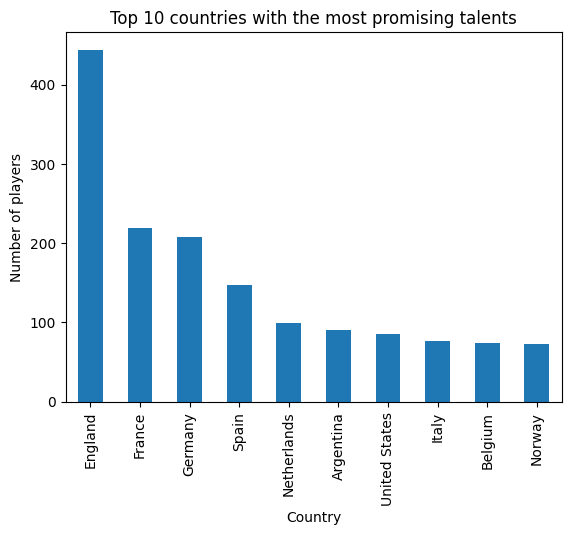

In [196]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

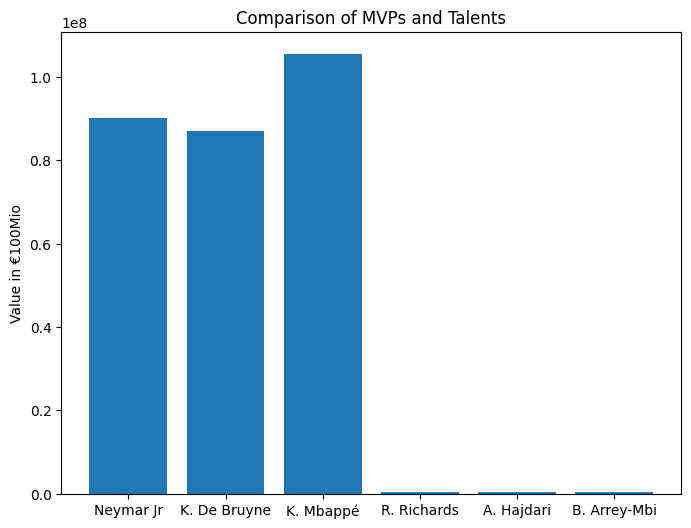

In [197]:
# create a dataframe with 'name' and 'value' columns
df = pd.DataFrame(data_copy, columns=['name', 'value'])

# select the rows for the six specific players you want to plot
players = ['K. Mbappé', 'Neymar Jr', 'K. De Bruyne', 'R. Richards', 'A. Hajdari','B. Arrey-Mbi']
df_players = df[df['name'].isin(players)]

# create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(df_players['name'], df_players['value'])
plt.ylabel('Value in €100Mio')
plt.title('Comparison of MVPs and Talents')

# show the chart
plt.show()

## 04 - Processing Data

### Dealing with multicollinearity

In [198]:
# Correlation Matrix
X_N_corr = X_N.corr()
X_N_corr

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
age,1.000000,0.508255,-0.526288,-0.881287,0.177067,0.311956,0.087898,0.395906,0.331669,-0.024513,0.507918,0.519065,0.229762,0.203484,0.509856,0.459719,0.171594,NaN,-0.166155,0.099497,0.246526,NaN,-0.063322,-0.179963,0.588280
bov,0.508255,1.000000,0.258420,-0.585700,0.736511,0.514555,0.615411,0.579416,0.522000,0.218381,0.611279,0.620201,0.299913,0.105740,0.732508,0.749797,0.313317,NaN,0.197236,0.084229,0.187961,NaN,-0.121396,-0.162037,0.965845
pot,-0.526288,0.258420,1.000000,0.605944,0.408844,0.108789,0.417501,0.031818,0.078568,0.117527,-0.082001,-0.015947,0.049062,-0.123635,0.045505,0.082796,0.068057,NaN,0.400002,-0.047677,-0.113579,NaN,-0.023886,0.047358,0.198705
growth,-0.881287,-0.585700,0.605944,1.000000,-0.277575,-0.345417,-0.165056,-0.440568,-0.355084,-0.082898,-0.556762,-0.517622,-0.209762,-0.197086,-0.557295,-0.539369,-0.201155,NaN,0.183951,-0.100549,-0.246959,NaN,0.085407,0.167029,-0.659240
value,0.177067,0.736511,0.408844,-0.277575,1.000000,0.581001,0.761341,0.433521,0.392137,0.221720,0.425740,0.411861,0.153224,0.052221,0.516270,0.539145,0.270795,NaN,0.255701,0.036103,0.087728,NaN,-0.128131,-0.094250,0.728419
wage,0.311956,0.514555,0.108789,-0.345417,0.581001,1.000000,0.467973,0.371676,0.313993,0.083418,0.358453,0.360611,0.122531,0.086913,0.409028,0.394252,0.200154,NaN,0.144892,0.080432,0.122427,NaN,-0.093596,-0.080215,0.528381
release_clause,0.087898,0.615411,0.417501,-0.165056,0.761341,0.467973,1.000000,0.341510,0.318407,0.205805,0.320805,0.327273,0.139055,0.013286,0.419366,0.443575,0.216865,NaN,0.242001,-0.001539,0.041442,NaN,-0.120060,-0.073424,0.597980
attacking,0.395906,0.579416,0.031818,-0.440568,0.433521,0.371676,0.341510,1.000000,0.704744,0.317828,0.628009,0.545326,-0.239362,0.108949,0.694623,0.639685,0.476679,NaN,0.108785,-0.051811,0.042240,NaN,-0.189453,-0.037657,0.572852
skill,0.331669,0.522000,0.078568,-0.355084,0.392137,0.313993,0.318407,0.704744,1.000000,0.396098,0.422174,0.628872,0.069605,0.074067,0.803498,0.718949,0.517979,NaN,0.094698,-0.262825,-0.166488,NaN,-0.136234,-0.015087,0.511726
movement,-0.024513,0.218381,0.117527,-0.082898,0.221720,0.083418,0.205805,0.317828,0.396098,1.000000,0.117929,0.122885,-0.191565,0.014415,0.417064,0.462625,0.445746,NaN,0.108395,-0.565677,-0.470331,NaN,-0.234773,0.067454,0.213218


Our matrix shows `NaN` values in `ir` and `w_f`.

After doing some research, we proceed to drop them to visualize a better heatmap.

In [206]:
X_N = X_N.drop(columns=["ir", 'w_f'])

KeyError: "['ir', 'w_f'] not found in axis"

In [207]:
X_N_corr = X_N.corr()
X_N_corr

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,hits,h_cm,w_kg,a_wr,d_wr,ova
age,1.000000,0.508255,-0.526288,-0.881287,0.177067,0.311956,0.087898,0.395906,0.331669,-0.024513,0.507918,0.519065,0.229762,0.203484,0.509856,0.459719,0.171594,-0.166155,0.099497,0.246526,-0.063322,-0.179963,0.588280
bov,0.508255,1.000000,0.258420,-0.585700,0.736511,0.514555,0.615411,0.579416,0.522000,0.218381,0.611279,0.620201,0.299913,0.105740,0.732508,0.749797,0.313317,0.197236,0.084229,0.187961,-0.121396,-0.162037,0.965845
pot,-0.526288,0.258420,1.000000,0.605944,0.408844,0.108789,0.417501,0.031818,0.078568,0.117527,-0.082001,-0.015947,0.049062,-0.123635,0.045505,0.082796,0.068057,0.400002,-0.047677,-0.113579,-0.023886,0.047358,0.198705
growth,-0.881287,-0.585700,0.605944,1.000000,-0.277575,-0.345417,-0.165056,-0.440568,-0.355084,-0.082898,-0.556762,-0.517622,-0.209762,-0.197086,-0.557295,-0.539369,-0.201155,0.183951,-0.100549,-0.246959,0.085407,0.167029,-0.659240
value,0.177067,0.736511,0.408844,-0.277575,1.000000,0.581001,0.761341,0.433521,0.392137,0.221720,0.425740,0.411861,0.153224,0.052221,0.516270,0.539145,0.270795,0.255701,0.036103,0.087728,-0.128131,-0.094250,0.728419
wage,0.311956,0.514555,0.108789,-0.345417,0.581001,1.000000,0.467973,0.371676,0.313993,0.083418,0.358453,0.360611,0.122531,0.086913,0.409028,0.394252,0.200154,0.144892,0.080432,0.122427,-0.093596,-0.080215,0.528381
release_clause,0.087898,0.615411,0.417501,-0.165056,0.761341,0.467973,1.000000,0.341510,0.318407,0.205805,0.320805,0.327273,0.139055,0.013286,0.419366,0.443575,0.216865,0.242001,-0.001539,0.041442,-0.120060,-0.073424,0.597980
attacking,0.395906,0.579416,0.031818,-0.440568,0.433521,0.371676,0.341510,1.000000,0.704744,0.317828,0.628009,0.545326,-0.239362,0.108949,0.694623,0.639685,0.476679,0.108785,-0.051811,0.042240,-0.189453,-0.037657,0.572852
skill,0.331669,0.522000,0.078568,-0.355084,0.392137,0.313993,0.318407,0.704744,1.000000,0.396098,0.422174,0.628872,0.069605,0.074067,0.803498,0.718949,0.517979,0.094698,-0.262825,-0.166488,-0.136234,-0.015087,0.511726
movement,-0.024513,0.218381,0.117527,-0.082898,0.221720,0.083418,0.205805,0.317828,0.396098,1.000000,0.117929,0.122885,-0.191565,0.014415,0.417064,0.462625,0.445746,0.108395,-0.565677,-0.470331,-0.234773,0.067454,0.213218


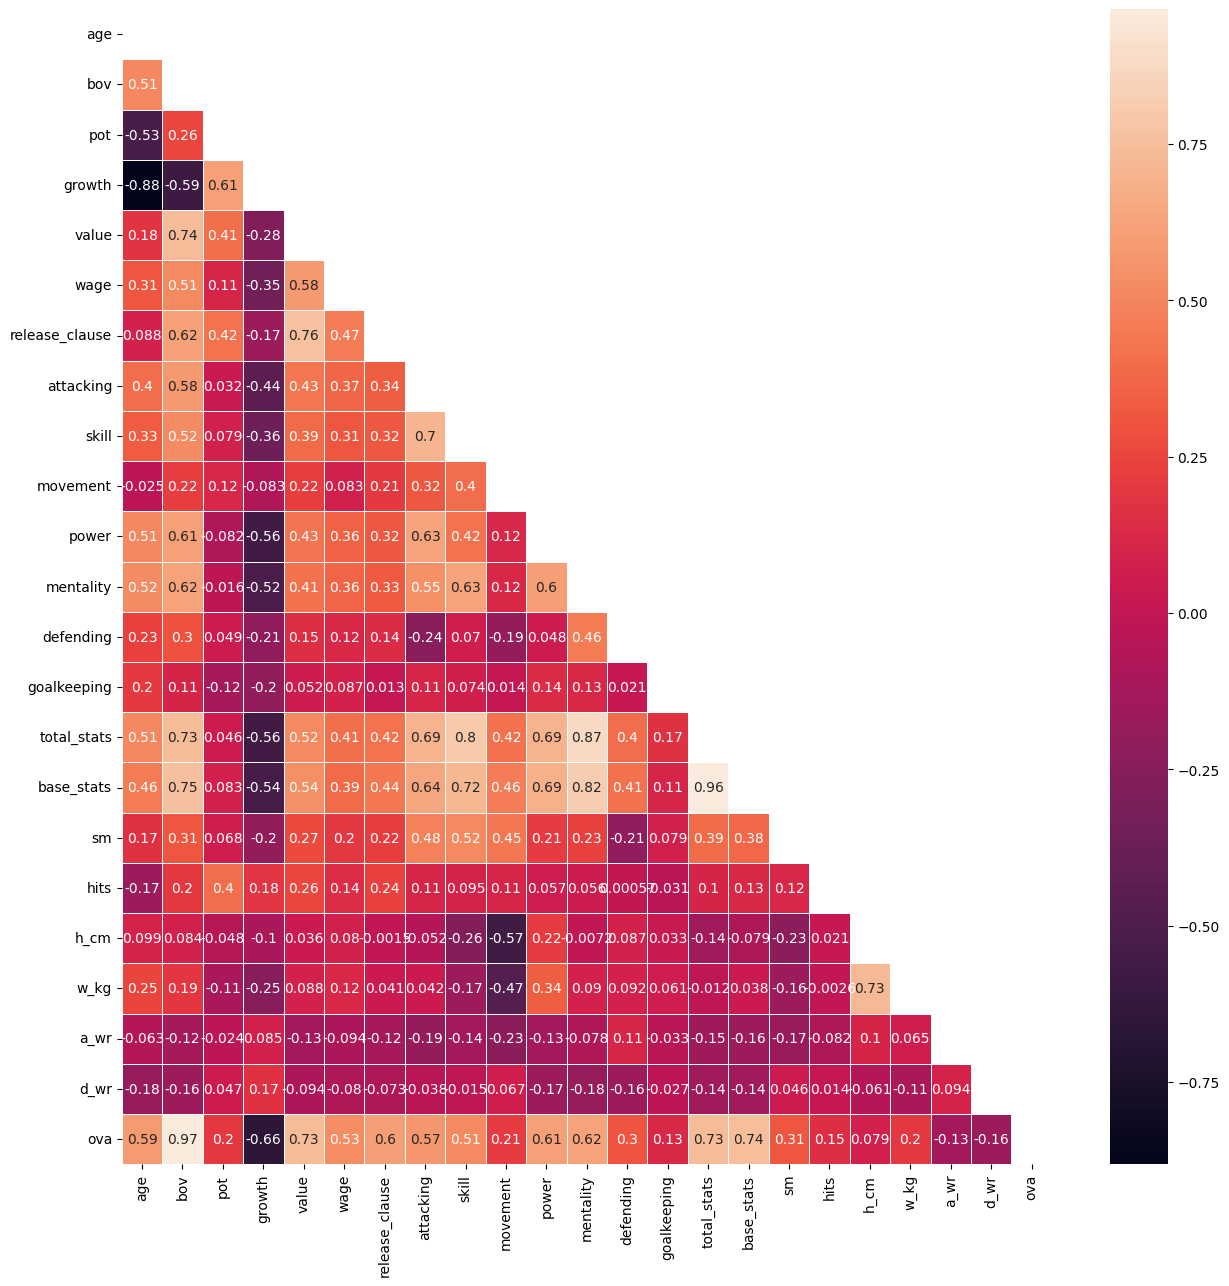

In [208]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_N_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(X_N_corr, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

The variables `total_stats` and `base_stats` in our dataset share multicollinearity.
Therefore, we decide to drop `total_stats` since the coefficent is 0.96 compared to our target.

In [211]:
X_N = X_N.drop(columns=['total_stats'])

### Normalizing the Data

### X-Y Split

In [212]:
# We do X-Y SPLIT BEFORE normalizing. ~ Xisca. We don't want to normalize the target
Y = X_N['ova']
X_N = X_N.drop(['ova'], axis=1)

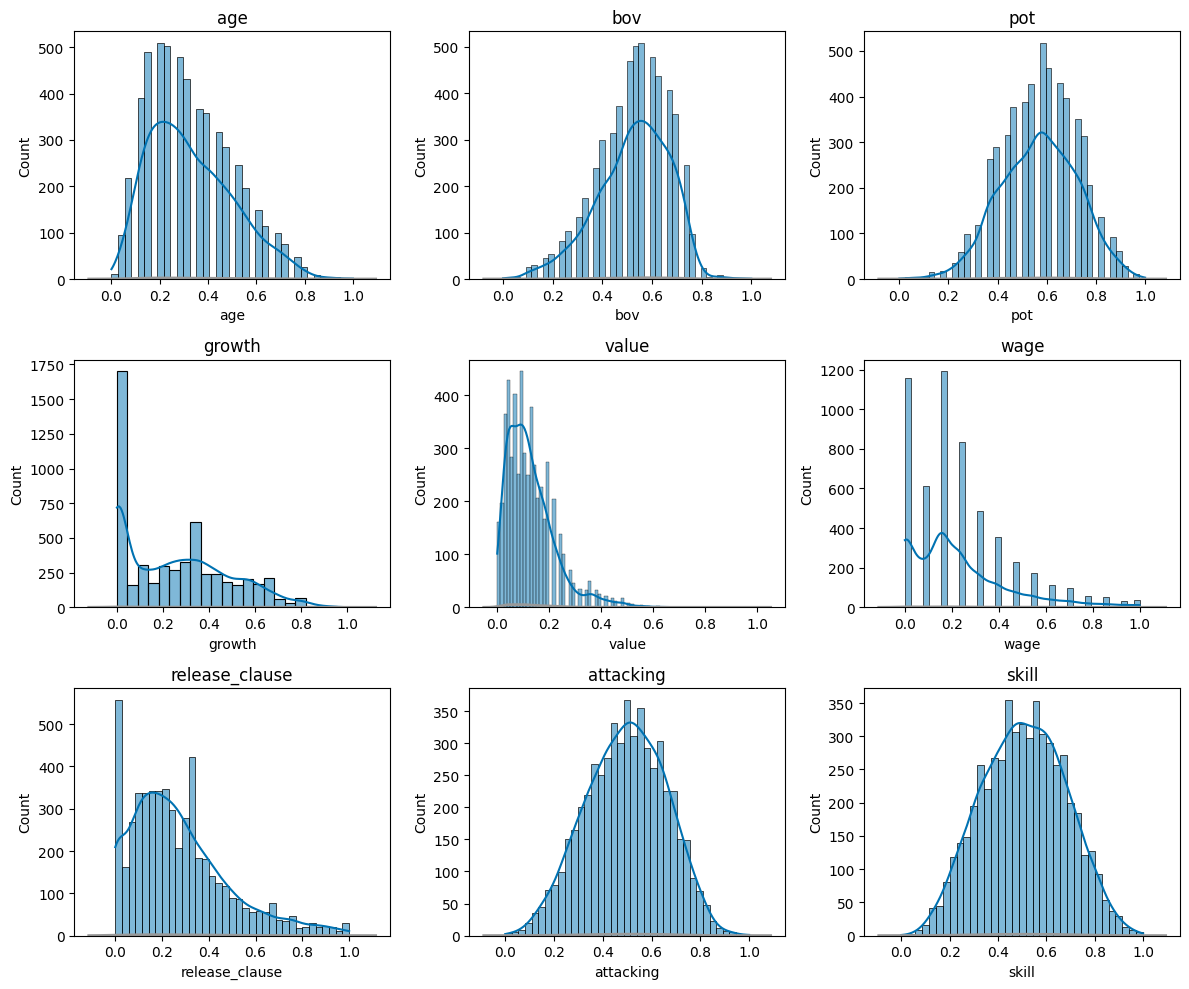

In [226]:
transformer = MinMaxScaler().fit(X_N) # rescale the Data into 0,1 for our model
X_N_minmax = transformer.transform(X_N) 

# create new data frame using data from 'X_N_minmax'
X_N_normalized = pd.DataFrame(X_N_minmax, columns = X_N.columns)

# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(X_N_normalized.columns):
        break
    sns.histplot(X_N_normalized.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_N_normalized.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_N_normalized.columns[i])
plt.tight_layout()
plt.show()

## 05 - Modeling

### Train-Test Split

In [227]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_N, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [228]:
len(X_N)*0.7 # Len before the test

3800.2999999999997

In [229]:
len(X_test) # Len after the test

1629

In [230]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

## 06 - Model Validation

In [231]:
predictions = model.predict(X_test)

In [232]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(1.0, 6.087427554855357e-11, 3.705677423561227e-21)

In [238]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  1.0
RMSE =  6.087427554855357e-11
The value of the metric MSE is  3.705677423561227e-21
MAE =  3.1349952440999684e-11


After the modifications, we probably overfitted the model since R2 is 1.0.
To check: OUTLIERS.

### Present results

In [234]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
809,67,67.0,2.785328e-11
11530,61,61.0,5.664447e-11
6932,61,61.0,6.041034e-11
1319,72,72.0,8.557777e-11
2609,67,67.0,2.336265e-11
...,...,...,...
7374,65,65.0,2.074785e-12
15662,61,61.0,1.492140e-11
13838,58,58.0,8.569145e-12
10646,58,58.0,9.649170e-12


In [235]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
5313,73,73.0,8.549819e-10
6747,72,72.0,6.356231e-10
6543,74,74.0,5.050538e-10
1698,73,73.0,5.042011e-10
4316,71,71.0,4.947367e-10
8493,70,70.0,4.715446e-10
10876,72,72.0,4.676508e-10
4647,71,71.0,4.180549e-10
10673,68,68.0,3.715286e-10
10512,71,71.0,3.510650e-10


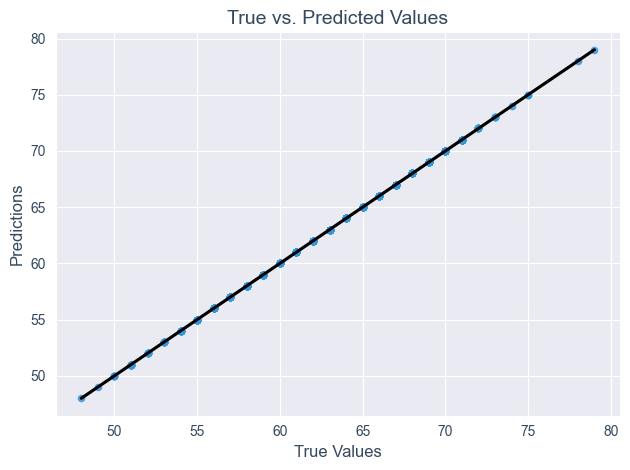

In [243]:
# Create the plot with regression line
sns.set_style('darkgrid')
sns.regplot(x='true', y='pred', data=results, color='black', scatter_kws={'s': 20, 'color': '#3498db'})
plt.xlabel('True Values', fontsize=12, color='#34495e')
plt.ylabel('Predictions', fontsize=12, color='#34495e')
plt.title('True Vs Predicted Values', fontsize=14, color='#34495e')
plt.xticks(fontsize=10, color='#34495e')
plt.yticks(fontsize=10, color='#34495e')
plt.tight_layout()
plt.show()

## 07 - Reporting

In [251]:
X_N.iloc[[0]]

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,base_stats,sm,hits,h_cm,w_kg,a_wr,d_wr
17,26,66,72,6,0.0,0.0,0.0,305,269,361,351,261,101,56,367,2,3,193.04,89.812211,3,3


In [250]:
results.iloc[[0]]

,true,pred,diff
809,67,67.0,2.785328e-11


In [253]:
# Creating a new 
names = data_copy.loc[results.index.to_list(), ["id","name"]]
names.head(10)

,id,name
809,159818,Élton
11530,239915,Pedro Martelo
6932,220893,C. Baker-Richardson
1319,175391,Mateus
2609,190659,H. Bazile
9724,233400,J. Glesnes
6127,214896,P. Mullin
10643,236785,T. Abrahams
14683,251632,N. Tarnat
1320,175393,J. Arce


In [255]:
# Merging with the results
test = pd.concat([names, results], axis=1)
test.head(10)

,id,name,true,pred,diff
809,159818,Élton,67,67.0,2.785328e-11
11530,239915,Pedro Martelo,61,61.0,5.664447e-11
6932,220893,C. Baker-Richardson,61,61.0,6.041034e-11
1319,175391,Mateus,72,72.0,8.557777e-11
2609,190659,H. Bazile,67,67.0,2.336265e-11
9724,233400,J. Glesnes,68,68.0,1.497824e-11
6127,214896,P. Mullin,61,61.0,2.336265e-11
10643,236785,T. Abrahams,59,59.0,1.553246e-11
14683,251632,N. Tarnat,61,61.0,6.735945e-12
1320,175393,J. Arce,68,68.0,3.697664e-11


In [257]:
test[test.name=='C. Baker-Richardson']

,id,name,true,pred,diff
6932,220893,C. Baker-Richardson,61,61.0,6.041034e-11


In [259]:
data_copy[data_copy.name=='C. Baker-Richardson']

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
6932,220893,C. Baker-Richardson,23,61,England,Accrington Stanley,62,ST,https://cdn.sofifa.com/players/220/893/20_120.png,https://cdn.sofifa.com/teams/110313/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,68,"Accrington Stanley Jun 30, 2020 On Loan","6'2""",161lbs,Right,7,"Aug 14, 2017",350000.0,1000.0,NaN,"Jun 30, 2020 On Loan",248,28,64,58,51,47.0,195,49,35.0,23,30,58,300,62,69,51.0,58,60.0,279,63,54.0,56,64,42,226,42,16.0,64.0,43.0,61,41,10,17,14.0,58,12,15,8,9,14,1347,292,3 ★,2,Medium,Medium,1,66,58,39,53,19,57,5,60+2,60+2,60+2,54+0,57+0,57+0,57+0,54+0,53+2,53+2,53+2,52+2,46+2,46+2,46+2,52+2,37+2,36+2,36+2,36+2,37+2,36+2,34+2,34+2,34+2,36+2,17+2,Male,187.96,73.029121,3,2,2,7


[Presentation](https://docs.google.com/presentation/d/1Td9rJDfuB_epbsVk1nrdaiT-oH_MAjnKdBoWULncyT0/edit#slide=id.gc6f9e470d_0_126)